## How can we pre-process outliers?

- Trimming: remove the outliers from our dataset
- Treat outliers as missing data, and proceed with any missing data imputation technique (**Data imputation**)
- Discrestisation: outliers are placed in border bins together with higher or lower values of the distribution(**Descretization**)
- Censoring: capping the variable distribution at a max and / or minimum value

**Censoring** is also known as:

- top and bottom coding
- winsorization
- capping

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for Q-Q plots
import scipy.stats as stats
# boston house dataset for the demo
from sklearn.datasets import load_boston

In [5]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]

boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [6]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\Yash\anaconda3\envs\ML_algo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


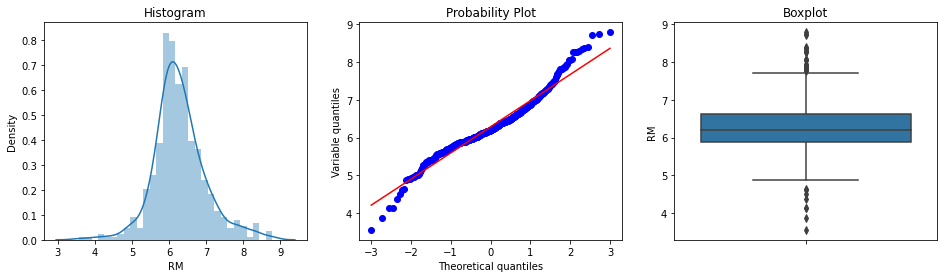

In [7]:
diagnostic_plots(boston, 'RM')

## Censoring or Capping.

**Censoring**, or **capping**, means capping the maximum and /or minimum of a distribution at an arbitrary value. On other words, values bigger or smaller than the arbitrarily determined ones are **censored**.

Capping can be done at both tails, or just one of the tails, depending on the variable and the user.

The numbers at which to cap the distribution can be determined:

- arbitrarily
- using the inter-quantal range proximity rule
- using the gaussian approximation
- using quantiles


## Capping with IQR

In [10]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [11]:
# find limits for RM
RM_upper_limit, RM_lower_limit = find_skewed_boundaries(boston, 'RM', 1.5)
RM_upper_limit, RM_lower_limit

(7.730500000000001, 4.778499999999999)

In [12]:
# let's flag the outliers in the data set

outliers_RM = np.where(boston['RM'] > RM_upper_limit, True,
                       np.where(boston['RM'] < RM_lower_limit, True, False))

In [13]:
boston_trimmed = boston.loc[~(outliers_RM ) ]

boston.shape, boston_trimmed.shape

((506, 3), (476, 3))

C:\Users\Yash\anaconda3\envs\ML_algo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


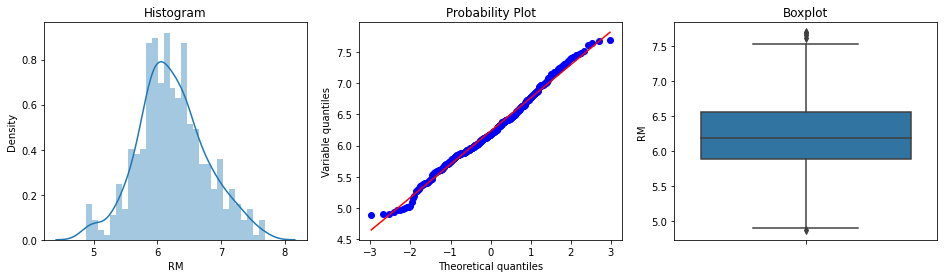

In [14]:
diagnostic_plots(boston_trimmed, 'RM')

In [15]:
# Now let's replace the outliers by the maximum and minimum limit

boston['RM_1']= np.where(boston['RM'] > RM_upper_limit, RM_upper_limit,
                       np.where(boston['RM'] < RM_lower_limit, RM_lower_limit, boston['RM']))

C:\Users\Yash\anaconda3\envs\ML_algo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


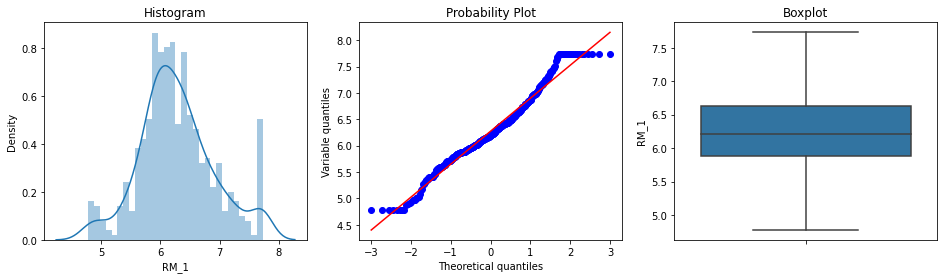

In [17]:
diagnostic_plots(boston, 'RM_1')

## Capping By mean/Gaussian approximation

In [18]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()

    return upper_boundary, lower_boundary

In [19]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_normal_boundaries(boston, 'RM', 3)
RM_upper_limit, RM_lower_limit

(8.392485817597748, 4.176782957105809)

In [20]:
# Now let's replace the outliers by the maximum and minimum limit

boston['RM_2']= np.where(boston['RM'] > RM_upper_limit, RM_upper_limit,
                       np.where(boston['RM'] < RM_lower_limit, RM_lower_limit, boston['RM']))

C:\Users\Yash\anaconda3\envs\ML_algo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


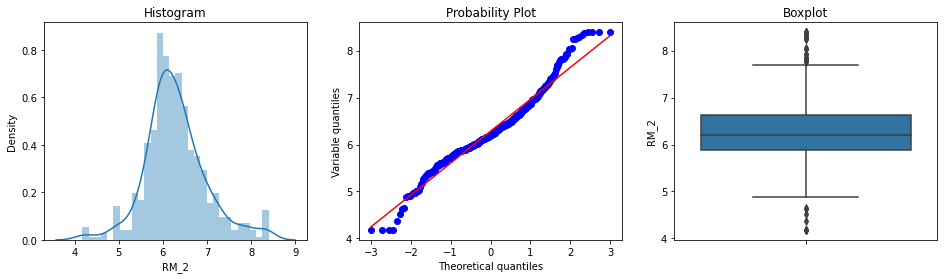

In [21]:
# let's explore outliers in the trimmed dataset
# for RM we see much less outliers as in the original dataset

diagnostic_plots(boston, 'RM_2')

## Capping By Quantiles 

In [22]:
def find_boundaries(df, variable):

    # the boundaries are the quantiles

    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)

    return upper_boundary, lower_boundary

In [23]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM')
RM_upper_limit, RM_lower_limit

(7.5875, 5.314)

In [24]:
# Now let's replace the outliers by the maximum and minimum limit

boston['RM_3']= np.where(boston['RM'] > RM_upper_limit, RM_upper_limit,
                       np.where(boston['RM'] < RM_lower_limit, RM_lower_limit, boston['RM']))

C:\Users\Yash\anaconda3\envs\ML_algo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


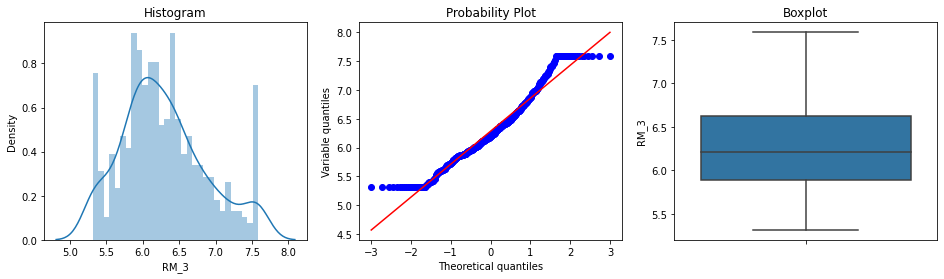

In [26]:
# let's explore outliers in the trimmed dataset
# for RM we see much less outliers as in the original dataset

diagnostic_plots(boston, 'RM_3')